In [1]:
#!pip3 install matplotlib

In [2]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("games.csv")


In [63]:
df.shape

(20058, 17)

In [75]:
df.describe

<bound method NDFrame.describe of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rat

In [46]:
df.opening_name.value_counts()

Van't Kruijs Opening                                                     368
Sicilian Defense                                                         358
Sicilian Defense: Bowdler Attack                                         296
Scotch Game                                                              271
French Defense: Knight Variation                                         271
                                                                        ... 
Zukertort Opening: Double Fianchetto Attack                                1
Queen's Gambit Declined: Cambridge Springs Variation                       1
Scandinavian Defense: Anderssen Counterattack |  Goteborg System           1
Queen's Indian Defense: Fianchetto Variation |  Nimzowitsch Variation      1
Russian Game: Modern Attack                                                1
Name: opening_name, Length: 1477, dtype: int64

In [47]:
#get rid of variants for basic openings
df["simple_opening_name"] = df.opening_name.replace(r'(\||:)\s(.*)',"", regex=True )

In [61]:
df.simple_opening_name.value_counts().head(30)

Sicilian Defense           2573
French Defense             1306
Queen's Pawn Game          1059
Italian Game                981
King's Pawn Game            917
Ruy Lopez                   858
English Opening             720
Scandinavian Defense        716
Caro-Kann Defense           593
Scotch Game                 465
Queen's Gambit Declined     394
Four Knights Game           370
Van't Kruijs Opening        368
Zukertort Opening           336
Bishop's Opening            323
Indian Game                 319
Philidor Defense            272
Queen's Gambit Accepted     253
Russian Game                252
Queen's Gambit Refused      251
Modern Defense              225
Horwitz Defense             209
Nimzowitsch Defense         200
Philidor Defense #3         198
King's Indian Defense       197
Philidor Defense #2         193
Alekhine Defense            188
Slav Defense                187
King's Knight Opening       183
Hungarian Opening           179
Name: simple_opening_name, dtype: int64

In [60]:
df.groupby(["simple_opening_name"]).mean()[["white_rating","black_rating"]].sort_values(["white_rating"],ascending=False).head(10)

,white_rating,black_rating
simple_opening_name,,
Latvian Gambit Accepted,2250.000000,2218.250000
Doery Defense,2201.000000,2173.000000
King's Indian,2140.000000,2027.666667
Benko Gambit Accepted,2129.875000,2111.375000
Blumenfeld Countergambit Accepted,2124.750000,2122.000000
Benko Gambit Declined,2070.666667,1984.333333
Vienna Game #2,2042.666667,2169.000000
Bogo-Indian Defense,1965.300000,1869.600000
Pterodactyl Defense,1962.000000,1889.000000


In [71]:
df[df["white_rating"]>1700][df["black_rating"]<1300].groupby(["simple_opening_name"]).mean()[["white_rating","black_rating"]].sort_values(["white_rating"],ascending=False).head(10)

,white_rating,black_rating
simple_opening_name,,
Reti Opening,2454.000000,1254.000000
Carr Defense,2438.000000,946.000000
Queen's Gambit,2156.000000,1220.000000
Semi-Bononi,2135.000000,1151.000000
Mexican Defense,2123.000000,1108.000000
Philidor Defense,2097.000000,1017.000000
Indian Game,2047.000000,1268.000000
King's Pawn,2032.000000,1223.000000
Borg Defense,2030.000000,1225.000000


In [72]:
df[df["white_rating"]>1700].simple_opening_name.value_counts().head(30)

Sicilian Defense           1106
French Defense              519
Queen's Pawn Game           384
Ruy Lopez                   338
Italian Game                299
English Opening             258
Caro-Kann Defense           250
Scandinavian Defense        209
Queen's Gambit Declined     201
Indian Game                 145
Scotch Game                 140
Zukertort Opening           138
King's Indian Defense       132
Nimzo-Indian Defense        104
Queen's Gambit Refused      103
Slav Defense                 92
Queen's Gambit Accepted      91
Modern Defense               85
Dutch Defense                84
King's Pawn Game             81
Philidor Defense             80
Four Knights Game            80
Horwitz Defense              72
Semi-Slav Defense            67
Bishop's Opening             67
King's Indian Attack         65
Russian Game                 65
King's Gambit Accepted       59
Nimzo-Larsen Attack          58
Owen Defense                 58
Name: simple_opening_name, dtype: int64

In [73]:
df[df["white_rating"]>2000].simple_opening_name.value_counts().head(30)

Sicilian Defense           307
French Defense             113
Ruy Lopez                  111
English Opening             93
Queen's Pawn Game           85
Caro-Kann Defense           81
Italian Game                70
Queen's Gambit Declined     62
Scandinavian Defense        59
King's Indian Defense       40
Nimzo-Indian Defense        39
Scotch Game                 36
Indian Game                 35
Modern Defense              32
Zukertort Opening           29
Queen's Gambit Refused      23
Four Knights Game           22
Slav Defense                18
Russian Game                17
Queen's Gambit Accepted     17
Dutch Defense               17
King's Indian Attack        17
Philidor Defense            17
Horwitz Defense             16
Semi-Slav Defense           16
Bird Opening                16
Queen's Indian Defense      15
Rat Defense                 14
Pirc Defense                13
Benoni Defense              13
Name: simple_opening_name, dtype: int64

In [78]:
df[df["white_rating"]>2000].opening_eco.value_counts().head(30)

D02    60
B01    59
A40    47
C00    43
B00    40
B20    32
A45    31
D00    30
C45    30
A00    30
C41    29
A04    28
B06    27
B07    27
C50    25
B12    21
B21    21
B30    21
C55    21
B13    19
D30    18
B90    18
C44    17
C60    17
C65    16
B23    16
C42    16
B50    16
A46    16
B40    15
Name: opening_eco, dtype: int64

In [ ]:
"""
A00-A39	= FLANK OPENINGS (neither 1.d4 nor 1.e4) - includes English Opening
A40-A44	= QP OPENING without 1..d5 or 1..f5 or 1..Nf6 reply
A45-A49	= QP OPENING, INDIAN DEFENCE (1.d4 Nf6) without 2.c4
A50-A79	= QP OPENING, INDIAN DEFENCE with 2.c4 but without 2..e6 or 2..g6
A80-A99	= QP OPENING with 1..f5 reply (= Dutch Defence)
B00-B19	= KP OPENING without 1..c5, ..1.e6 or ..1.e5 - incl. Alekhine, Caro-Kann Defs.
B20-B99	= KP OPENING with 1..c5 reply (= Sicilian Defence)
C00-C19	= KP OPENING with 1..e6 reply (= French Defence)
C20-C99	= KP OPENING with 1..e5 reply (= Mutual King's Pawn, incl. Ruy Lopez)
D00-D05	= QP GAME (1.d4 d5) without 2.c4 (= Queen's Pawn Game)
D06-D69	= QP GAME (1.d4 d5) with 2.c4 (= Queen's Gambit)
D70-D99	= QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) with early ..d5 (= Grunfeld Defence)
E00-E59	= QP, INDIAN DEF. (1.d4 Nf6) with 2.c4 e6 - includes Catalan Opening
E60-E99	= QP, INDIAN DEF. (1.d4 Nf6, 2.c4 g6) without early ..d5 (= King's Indian)
"""


In [79]:
df[df["white_rating"]>1000].opening_eco.value_counts().head(30)

A00    977
C00    831
D00    716
B01    702
C41    689
C20    648
B00    601
A40    599
B20    559
C50    530
C40    439
D02    434
C44    369
C42    324
C55    312
B07    299
C45    282
A04    281
C02    276
C46    262
A45    249
B21    237
B30    226
B50    225
D20    211
B10    193
B06    170
C21    168
B12    167
D06    167
Name: opening_eco, dtype: int64

In [102]:
#What is the avg ELO of KP vs QP vs Flank?


df["first_move"] = df.opening_eco.replace(r'(A0|A1|A2|A3)(.*)',"Flank", regex=True ).sort_values()
df["first_move"] = df["first_move"].replace(r'(A4|A5|A6|A7|A8|A9|D|E)(.*)',"QP", regex=True ).sort_values()
df["first_move"] = df["first_move"].replace(r'(B|C)(.*)',"KP", regex=True ).sort_values()

In [113]:
df["first_move"].value_counts(normalize=True)

KP       0.642935
QP       0.231329
Flank    0.125735
Name: first_move, dtype: float64

In [114]:
df[df["white_rating"]>1500]["first_move"].value_counts(normalize=True)

KP       0.628177
QP       0.266117
Flank    0.105706
Name: first_move, dtype: float64

In [115]:
df[df["white_rating"]<=1500]["first_move"].value_counts(normalize=True)

KP       0.664384
QP       0.180773
Flank    0.154843
Name: first_move, dtype: float64

In [121]:
df[df["white_rating"]>2000]["first_move"].value_counts(normalize=True)

KP       0.587514
QP       0.298216
Flank    0.114270
Name: first_move, dtype: float64

In [122]:
df[df["white_rating"]<1000]["first_move"].value_counts(normalize=True)

KP       0.603239
QP       0.210526
Flank    0.186235
Name: first_move, dtype: float64

(array([ 180., 1082., 2888., 5418., 4562., 3323., 1665.,  750.,  150.,
          40.]),
 array([ 784. ,  975.6, 1167.2, 1358.8, 1550.4, 1742. , 1933.6, 2125.2,
        2316.8, 2508.4, 2700. ]),
 <BarContainer object of 10 artists>)

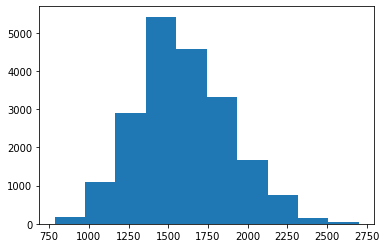

In [123]:
plt.hist(df["white_rating"])

In [168]:
#Who wins more: black or white?
df[["winner"]].value_counts(normalize=True)

winner
white     0.498604
black     0.454033
draw      0.047363
dtype: float64

In [171]:
#Who wins more in lower elos: black or white?
df[df["white_rating"]<=1600][["winner"]].value_counts(normalize=True)

winner
black     0.501104
white     0.457774
draw      0.041122
dtype: float64

In [172]:
#Who wins more in higher elos: black or white?
df[df["white_rating"]>1600][["winner"]].value_counts(normalize=True)

winner
white     0.546909
black     0.398346
draw      0.054745
dtype: float64

In [131]:
#what is the winningest first move?
df[df["first_move"]=="KP"][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
KP          white     0.506591
            black     0.448279
            draw      0.045130
dtype: float64

In [132]:
df[df["first_move"]=="QP"][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
QP          white     0.493103
            black     0.457974
            draw      0.048922
dtype: float64

In [133]:
df[df["first_move"]=="Flank"][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
Flank       black     0.476209
            white     0.467883
            draw      0.055908
dtype: float64

In [155]:
#what about in lower elos?
df[df["first_move"]=="KP"][df["white_rating"]<1600][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
KP          black     0.486650
            white     0.471786
            draw      0.041563
dtype: float64

In [153]:
df[df["first_move"]=="QP"][df["white_rating"]<1600][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
QP          black     0.517848
            white     0.444988
            draw      0.037164
dtype: float64

In [156]:
df[df["first_move"]=="Flank"][df["white_rating"]<1600][["first_move","winner"]].value_counts(normalize=True)

first_move  winner
Flank       black     0.546230
            white     0.408525
            draw      0.045246
dtype: float64

winner
black     0.500923
white     0.457826
draw      0.041251
dtype: float64

In [167]:
(df["white_rating"]-df["black_rating"]).mean() #shouldn't this be 0?

7.799880346993718

In [176]:
rated_df = df[df["rated"] == True]
(rated_df["white_rating"]-rated_df["black_rating"]).mean() 

3.5988238935314145

In [177]:
rated_df.shape

(16155, 18)

In [178]:
df.shape

(20058, 18)

In [180]:
df.opening_ply.describe()

count    20058.000000
mean         4.816981
std          2.797152
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: opening_ply, dtype: float64

In [181]:
df[df["white_rating"]<1600].opening_ply.describe()

count    10836.000000
mean         4.244647
std          2.344419
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         28.000000
Name: opening_ply, dtype: float64

In [182]:
df[df["white_rating"]>1600].opening_ply.describe() #higher elo = know more theory

count    9188.000000
mean        5.490966
std         3.118994
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        28.000000
Name: opening_ply, dtype: float64

In [189]:
#are there more checkmates in lower elos?
df[df["white_rating"]<1550].victory_status.value_counts(normalize=True) 

resign       0.499738
mate         0.382146
outoftime    0.078884
draw         0.039232
Name: victory_status, dtype: float64

In [188]:
#are there more checkmates in lower elos?
df[df["white_rating"]>1550].victory_status.value_counts(normalize=True) 

resign       0.606578
mate         0.254528
outoftime    0.088179
draw         0.050715
Name: victory_status, dtype: float64

In [192]:
df.increment_code.value_counts(normalize=True).head(10)

10+0     0.384934
15+0     0.065360
15+15    0.042377
5+5      0.036793
5+8      0.034749
8+0      0.029315
10+5     0.028866
15+10    0.022983
20+0     0.022335
30+0     0.018696
Name: increment_code, dtype: float64

In [194]:
df[df["rated"]==True].shape


(16155, 18)